### Research Proposal

##### Background:
Pursuit of happiness is the motive behind barely every activity engaged in and decisions made by people in all aspects of their lives. Be it opting to resign from a job, choosing a spouse or deciding not to live in a particular neighbourhood, nearly every choice made by an adult is directly or indirectly connected to seeking happiness. <br>
<br>
As people grow into adulthood, they are faced with the decision to stay single or go into romantic partnership. In fact, many have had to make this decision over and over in their lives.  Just as many have had bitter experience in marriages or partnerships, a lot of single people attribute their lack of happiness to not being in a romantic relationship. 

##### Research Question:
 How true is it that people in romantic relationships is are happier than their single counterparts within the same age bracket?

##### Proposed Solution:
We are proposing to answer this question by studying the data collected through a survey. The survey will use a questionnaire to collect related information about people’s gender, age, relationship status and geographical location. A careful study of the pattern of the answers collected through this survey will form the bases for answering this age long question.

##### About the proposed questionnaire:
We are proposing a questionnaire that will ask question on the following subjects, pen on paper method will be used for response collection; <br>
<br>
Gender – m/f <br>
Age – numerical <br>
Partner – y/n <br>
Country – name of country <br>
Happy – rank from 0 to 8 with 0 representing being sad and 8 being extremely happy <br>
This data collection will cover six Eastern European countries. <br>

##### Methodology:
As earlier mentioned this research will be based on studying the data collected from a survey questionnaire designed to capture the relevant information. Highlighted below is the step by step procedure for this study. <br>
<br>
I.	Send out questionnaire to relevant a groups <br>
II.	Collect cleaned and restructure data to enable detailed analysis in python <br>
III.	Split data into two groups based on the answer to the partnership question in the questionnaire <br>
IV.	Furthermore, group data by relevant age groups at a step of 10 years from age 15 <br>
V.	Use the “happy” variable as the output variable in the analysis <br>


##### import relevant tools

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

##### import data 
The data used is from ESS accessed through the link below

In [6]:
#importing data
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

#filtering out cols relevant to exteriment
data = df[['happy', 'agea', 'partner']].dropna()

#sort data by age
data = data.sort_values(by=['agea'])

##### split data into relevant age categories

In [7]:
#add age_categories to data

data['age_category'] = None
data.loc[(data.agea >= 15)&(data.agea <=24 ), 'age_category'] = '15_24'
data.loc[(data.agea >= 25)&(data.agea <=34 ), 'age_category'] = '25_34'
data.loc[(data.agea >= 35)&(data.agea <=44 ), 'age_category'] = '35_44'
data.loc[(data.agea >= 45)&(data.agea <=54 ), 'age_category'] = '45_54'
data.loc[(data.agea >= 55)&(data.agea <=64 ), 'age_category'] = '55_64'
data.loc[(data.agea >= 65)&(data.agea <=74 ), 'age_category'] = '65_74'
data.loc[(data.agea >= 75)&(data.agea <=84 ), 'age_category'] = '75_84'
data.loc[(data.agea >84), 'age_category'] = '>84'

age_categories = ['15_24', '25_34', '35_44', '45_54', '55_64', '65_74', '75_84', '>84']

#re-categorize the partner col into married and single
data.loc[data['partner'] == 1, 'partner'] = 'married'
data.loc[data['partner'] == 2, 'partner'] = 'single'

##### data overview

In [8]:
#compute sample sizes for each age category

sample_sizes = data.age_category.value_counts()
print(sample_sizes)

45_54    1544
35_44    1456
55_64    1362
15_24    1159
25_34    1128
65_74    1042
75_84     486
>84       132
Name: age_category, dtype: int64


In [9]:
#Data overview
print("\n")
print('Data shape: {}'.format(data.shape), "\n")
print(data.head(), "\n")



Data shape: (8309, 4) 

      happy  agea partner age_category
8593    7.0  15.0  single        15_24
6772    8.0  15.0  single        15_24
7685   10.0  15.0  single        15_24
7684    9.0  15.0  single        15_24
7683    7.0  15.0  single        15_24 



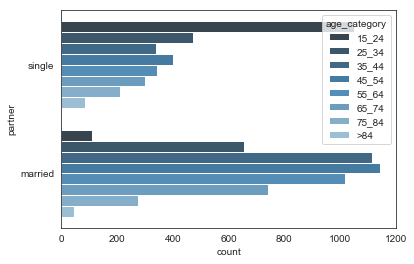

In [10]:
#visualization of data

sns.countplot(y="partner", hue="age_category", data=data, palette="Blues_d")
plt.show()

##### plotting ''happy'' against each age category for bothe the single and partner groups

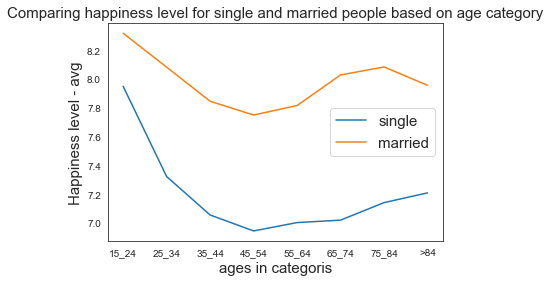

In [26]:
#let's see how happiness varies across ages in each gender group
#obtain data for male only, select only the 'age_category' and 'happy' column, group the resulting data by 'age_category', 
#finally obtain the mean for each group. Do the same for female 
data_single = data[data.partner=='single'][['age_category', 'happy']].groupby('age_category').mean()
data_married = data[data.partner=='married'][['age_category', 'happy']].groupby('age_category').mean()

#plotting the mean for male and female accross age categories
plt.plot(data_single)
plt.plot(data_married)
plt.legend(['single','married'], fontsize=15)
plt.title('Comparing happiness level for single and married people based on age category', fontsize=15)
plt.xlabel('ages in categoris', fontsize=15)
plt.ylabel('Happiness level - avg', fontsize=15)
plt.show()

In [12]:
#calculating t and p-values for the male and female categories

tvalues = [] 
pvalues = []
print('Test result for single and married across age categories', "\n")
for category in data.age_category.unique():
    print(category)
    categorized_data = data[data.age_category == category]
    tval, pval = stats.ttest_ind(categorized_data[categorized_data.partner == 'married'].happy,
                          categorized_data[categorized_data.partner == 'single'].happy)
    print(tval, pval, "\n")
    tvalues.append(tval)
    pvalues.append(pval)        

Test result for single and married across age categories 

15_24
2.4189743759314624 0.01571782843514271 

25_34
7.764359443462724 1.835588067546369e-14 

35_44
7.734463478893192 1.928283456248413e-14 

45_54
8.022645904569027 2.030172895938651e-15 

55_64
7.569690211504558 6.868756310591903e-14 

65_74
8.707254540979012 1.2045612792750301e-17 

75_84
5.177340583109178 3.3061011014268317e-07 

>84
1.929747306046516 0.0558165271718733 



In [13]:
# creating data for t-value plots
tvalues_plot = pd.DataFrame({'t': tvalues, 
                             'p': pvalues,
                             'sample_sizes': sample_sizes, 
                             'age_ranges': age_categories})

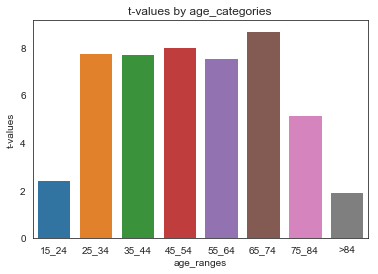

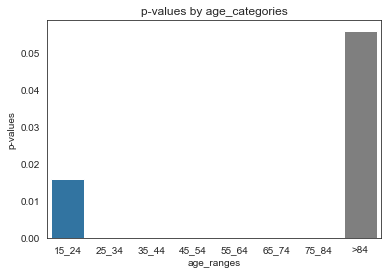

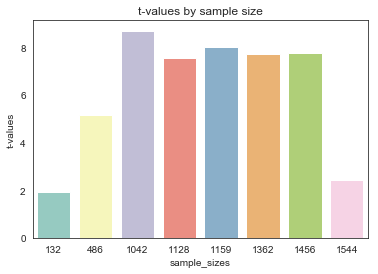

In [27]:
# t-values by age category

ax = sns.barplot(y='t',x='age_ranges',ci=None,data=tvalues_plot)
ax.set(ylabel='t-values',title='t-values by age_categories')
plt.show()

ax = sns.barplot(y='p',x='age_ranges',ci=None,data=tvalues_plot)
ax.set(ylabel='p-values',title='p-values by age_categories')
plt.show()

# t-values by sample sizes
ax = sns.barplot(y='t',x='sample_sizes',ci=None,data=tvalues_plot,palette='Set3')
ax.set(ylabel='t-values',title='t-values by sample size')
plt.show()

##### conclusion

As can be seen in the plot of age categories vs 'happy', it's obvious according to this experiment that people in romantic relationship are quite happier than their single counterparts within the same age categories. This mergin of this difference was also shown in the t-test conducted accross this two groups.